In [1]:
import numpy as np , pandas as pd , matplotlib.pyplot as plt ,seaborn as sns
from sklearn.preprocessing import StandardScaler ,MinMaxScaler , FunctionTransformer
import scipy.stats as stat
import pylab

In [3]:
df = pd.read_csv("titanic.csv")[["age"]].dropna()
df.head()

,age
0,29.00
1,0.92
2,2.00
3,30.00
4,25.00


# probplot on no preprocessing

In [4]:
def plot_(df,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
#     df[feature].plot(kind="hist")
    sns.histplot(df[feature],kde=True,bins=round(np.sqrt(len(df["age"]))))
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist="norm",plot=pylab)
    plt.show()

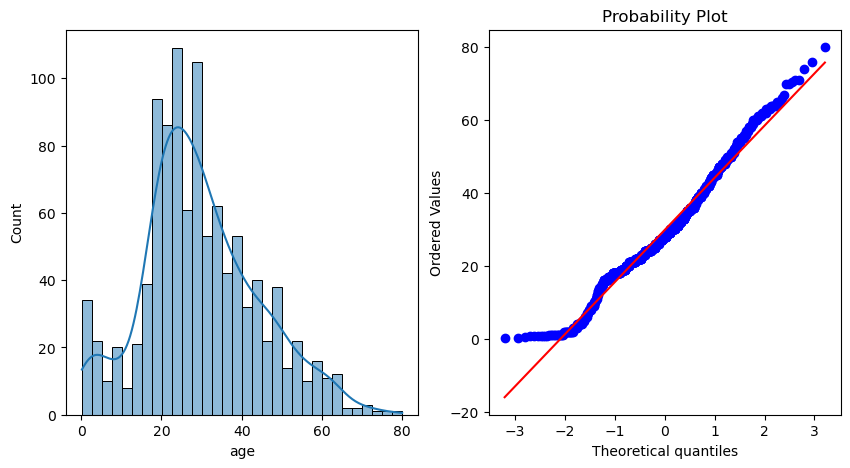

In [5]:
plot_(df,"age")

# probplot on standardscaler

In [6]:
sc = StandardScaler()
df["sc"] = sc.fit_transform(df["age"].values.reshape(-1,1))
df["sc"]

0      -0.061162
1      -2.010268
2      -1.935303
3       0.008251
4      -0.338813
          ...   
1301    1.084146
1304   -1.067645
1306   -0.234694
1307   -0.199987
1308   -0.061162
Name: sc, Length: 1046, dtype: float64

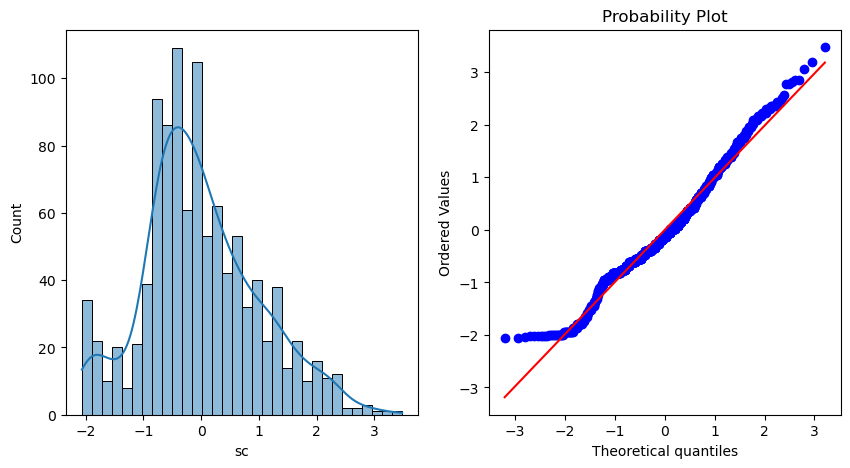

In [7]:
plot_(df,"sc")

# probplot on minmax scaler

In [84]:
mn = MinMaxScaler()
df["mn"] = mn.fit_transform(df["age"].values.reshape(-1,1))
df["mn"]

0       0.361142
1       0.009395
2       0.022924
3       0.373669
4       0.311036
          ...   
1301    0.567832
1304    0.179506
1306    0.329826
1307    0.336089
1308    0.361142
Name: mn, Length: 1046, dtype: float64

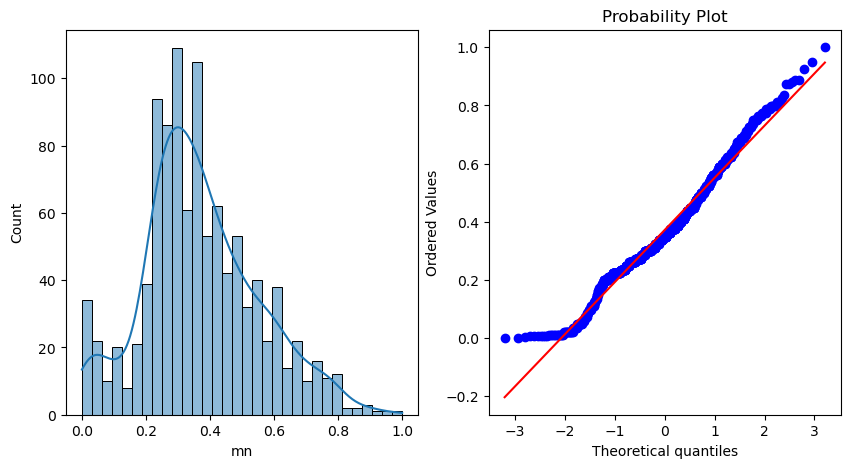

In [85]:
plot_(df,"mn")

# probplot on log transformation

In [14]:
# log transformation is applied on only columns with positive values and right skewed
# we cnalso use np.log but if we have value as zero then there is a problem

log_trf = FunctionTransformer(func=np.log1p)
df["log_"] = log_trf.fit_transform(df["age"])
# or
# df["log_"] = np.log1p(df["age"])
df["log_"]

0       5.385165
1       0.959166
2       1.414214
3       5.477226
4       5.000000
          ...   
1301    6.745369
1304    3.807887
1306    5.147815
1307    5.196152
1308    5.385165
Name: log_, Length: 1046, dtype: float64

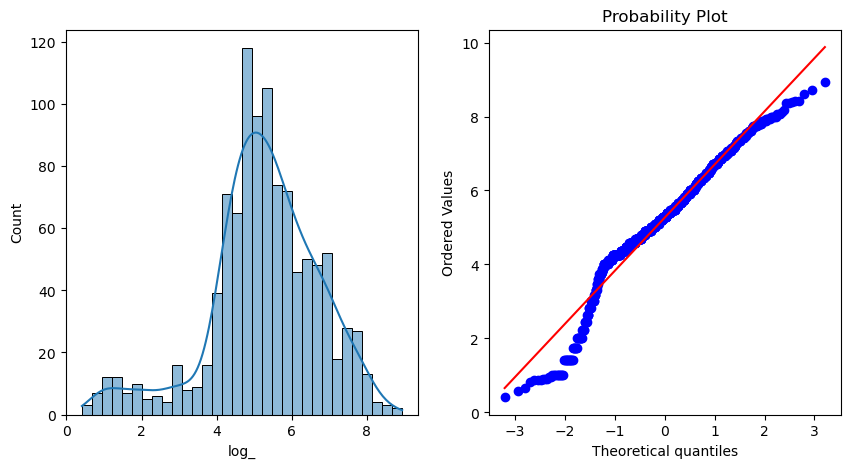

In [15]:
plot_(df,"log_")

# probplot on recipocal

In [88]:
df["reci"] = 1/df["age"]
df["reci"]

0       0.034483
1       1.086957
2       0.500000
3       0.033333
4       0.040000
          ...   
1301    0.021978
1304    0.068966
1306    0.037736
1307    0.037037
1308    0.034483
Name: reci, Length: 1046, dtype: float64

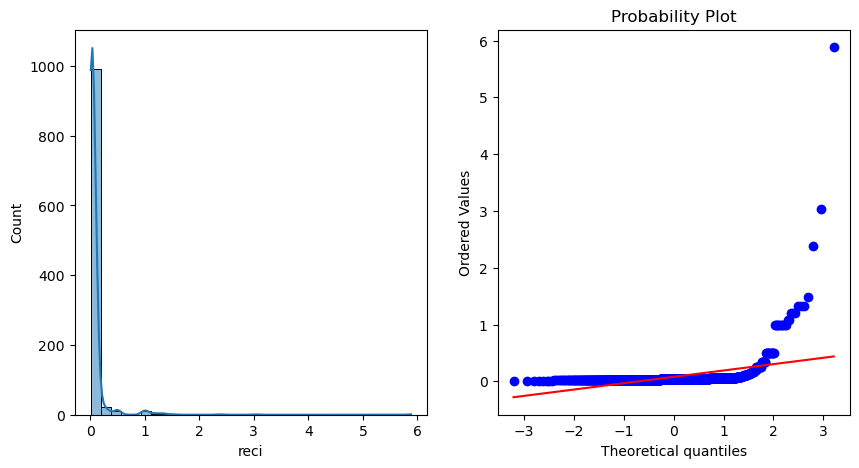

In [89]:
plot_(df,"reci")

# probplot on square root transformation

In [17]:
sqrt_trf = FunctionTransformer(func=np.sqrt)
df["sqrt_"] = sqrt_trf.fit_transform(df["age"])
# or
# df["sqrt"] = df.age**(1/2)
df["sqrt_"]

0       5.385165
1       0.959166
2       1.414214
3       5.477226
4       5.000000
          ...   
1301    6.745369
1304    3.807887
1306    5.147815
1307    5.196152
1308    5.385165
Name: sqrt_, Length: 1046, dtype: float64

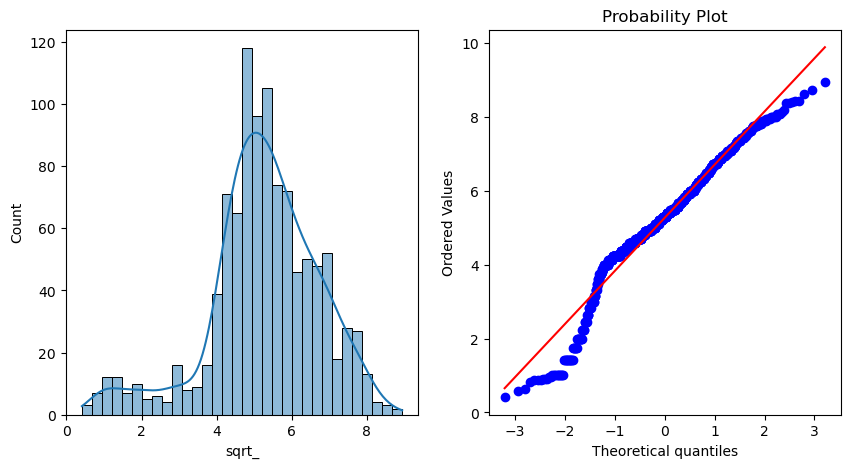

In [19]:
plot_(df,"sqrt_")

# probplot on square transformation

In [22]:
# usually applied on left skewed
square_trf = FunctionTransformer(func=np.square)
df["square_"] = square_trf.fit_transform(df["age"])
# or
# df["square_"] = df.age**(1/2)
df["square_"]

0        841.0000
1          0.8464
2          4.0000
3        900.0000
4        625.0000
          ...    
1301    2070.2500
1304     210.2500
1306     702.2500
1307     729.0000
1308     841.0000
Name: square_, Length: 1046, dtype: float64

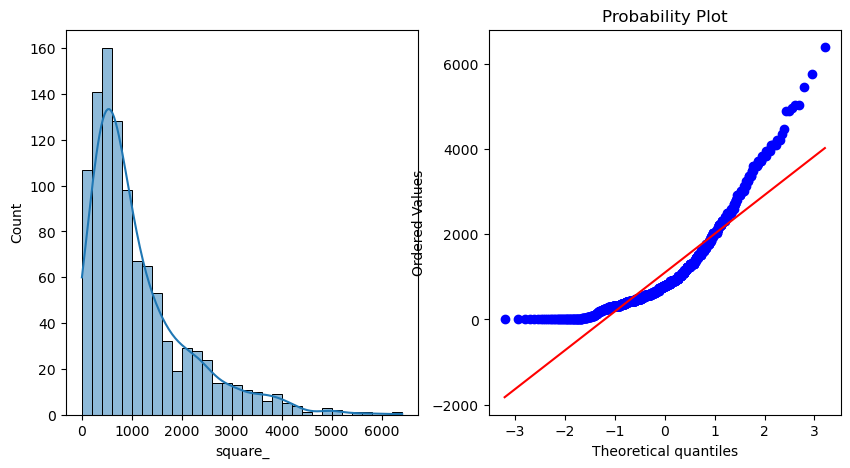

In [21]:
plot_(df,"square_")

# probplot exponential transformation

In [28]:
exp_trf = FunctionTransformer(func=np.exp)
df["exp_"] = exp_trf.fit_transform(df["age"])
# or
# df["exp_"] = df.age**(1/1.2)
df["exp_"]

0       16.544932
1        0.932874
2        1.781797
3       17.019013
4       14.620089
          ...    
1301    24.081091
1304     9.285529
1306    15.347521
1307    15.588457
1308    16.544932
Name: exp_, Length: 1046, dtype: float64

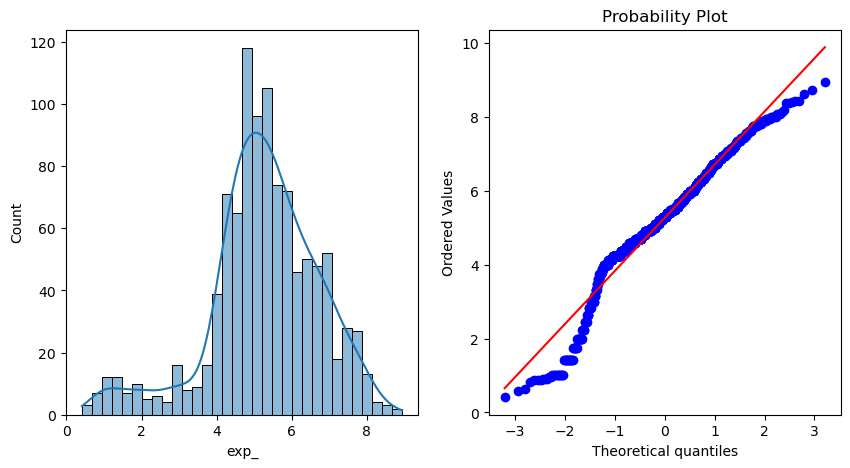

In [25]:
plot_(df,"exp_")

# probplot on box-cox transformation

In [34]:
# box-cox is only applicable for values > 0 and non-negetive (applied only on positive values > 0)
# suppose we have non negetive column but there is possibility that it has value 0 . 
# so we add 0.000001 so that it is nt zero and transformation can be applied.

from sklearn.preprocessing import PowerTransformer
pwr_trf = PowerTransformer(method="box-cox")
df["box-cox"] = pwr_trf.fit_transform(df[["age"]]+0.000001) # this method automatically selects the best lambda value

# df["box-cox"],parameters = stat.boxcox(df['age']+0.000001) # in this methid we have to manually give the lambda value 
df["box-cox"]

0       0.005559
1      -2.407065
2      -2.254614
3       0.073339
4      -0.271497
          ...   
1301    1.065253
1304   -1.058487
1306   -0.166429
1307   -0.131728
1308    0.005559
Name: box-cox, Length: 1046, dtype: float64

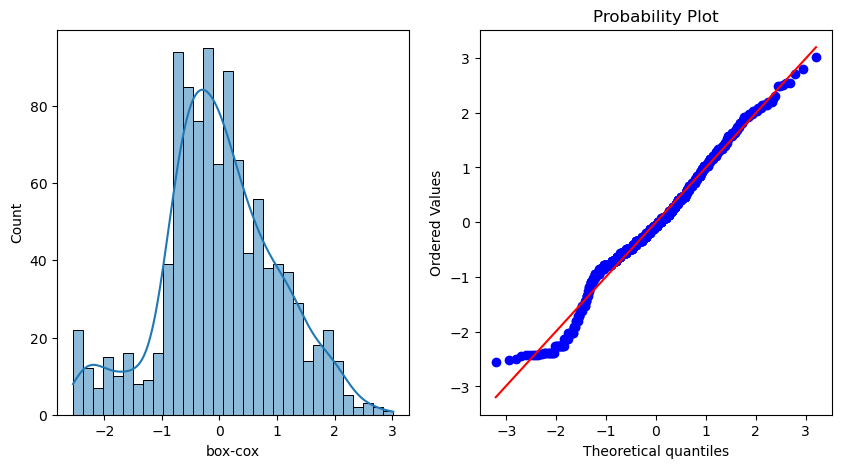

In [35]:
plot_(df,"box-cox")

# probplot on yeo-johnson transformation

In [41]:
# yeo johnson is default , it works for  -ve +ve and zero values

from sklearn.preprocessing import PowerTransformer
yeo_trf = PowerTransformer()
df["yeo"] = yeo_trf.fit_transform(df[["age"]]) # this method automatically selects the best lambda value

# df["yeo"],parameters = stat.boxcox(df['age']) # in this methid we have to manually give the lambda value 
df["box-cox"]

0       0.005559
1      -2.407065
2      -2.254614
3       0.073339
4      -0.271497
          ...   
1301    1.065253
1304   -1.058487
1306   -0.166429
1307   -0.131728
1308    0.005559
Name: box-cox, Length: 1046, dtype: float64

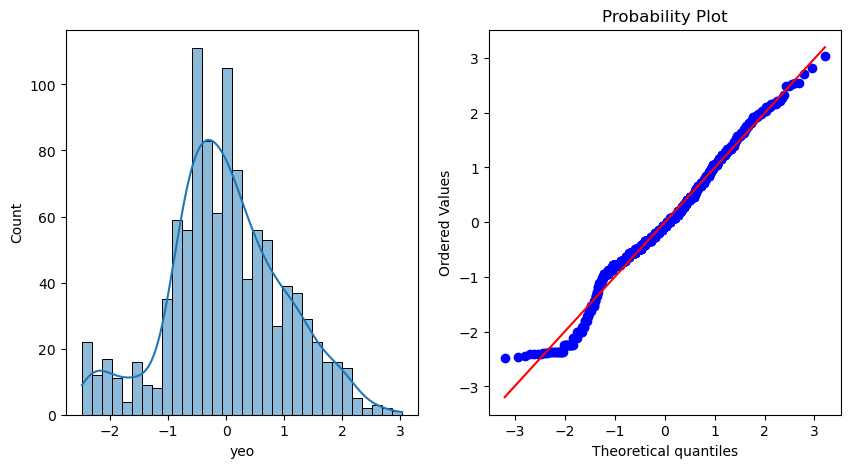

In [44]:
plot_(df,"yeo")

# collecetions

In [29]:
from collections import Counter

# A list of elements
# fruits = ['apple', 'orange', 'banana', 'apple', 'apple', 'orange', 'grape']

fruits = [1,2,3,1,3,7,6,1,9,2,8,4,9]
# Count the occurrences of each element
fruit_count = Counter(fruits)
print(fruit_count)


Counter({1: 3, 2: 2, 3: 2, 9: 2, 7: 1, 6: 1, 8: 1, 4: 1})


In [36]:
fruit_count.most_common()

[(1, 3), (2, 2), (3, 2), (9, 2), (7, 1), (6, 1), (8, 1), (4, 1)]

In [37]:
list(fruit_count.elements())

[1, 1, 1, 2, 2, 3, 3, 7, 6, 9, 9, 8, 4]

In [38]:
sub_ = {1:2,3:1}
fruit_count.subtract(sub_)
fruit_count

Counter({1: 1, 2: 2, 3: 1, 7: 1, 6: 1, 9: 2, 8: 1, 4: 1})

In [22]:
from collections import Counter

# A list of elements
fruits = ['apple', 'orange', 'banana', 'apple', 'apple', 'orange', 'grape']
# Count the occurrences of each element
fruit_count = Counter(fruits)
print(fruit_count)


Counter({'apple': 3, 'orange': 2, 'banana': 1, 'grape': 1})


In [1]:
from collections import namedtuple

fn = namedtuple("fullname",["fst","mid","last"])

mn = fn("bar","ney","allen")

print(mn)

fullname(fst='bar', mid='ney', last='allen')


In [11]:
from collections import deque

num_ = deque([],maxlen=3)

for i in range(6):
    num_.append(i)
    print(num_)

deque([0], maxlen=3)
deque([0, 1], maxlen=3)
deque([0, 1, 2], maxlen=3)
deque([1, 2, 3], maxlen=3)
deque([2, 3, 4], maxlen=3)
deque([3, 4, 5], maxlen=3)


In [12]:
num_.appendleft(3)
num_

deque([3, 3, 4])

In [13]:
num_.append(6)
num_

deque([3, 4, 6])

In [10]:
from collections import ChainMap

asd = ChainMap({"a":"v1","b":"v2"},{"a":"v3","d":"v4"})

asd

ChainMap({'a': 'v1', 'b': 'v2'}, {'a': 'v3', 'd': 'v4'})

In [11]:
list(asd)

['a', 'd', 'b']

In [14]:
print(asd["a"])
print(asd["b"])
print(asd["d"])

#  it considers only first value for "a"

v1
v2
v4


In [42]:
from collections import OrderedDict

dd = OrderedDict()
dd[2] = "a"
dd[3] = "t"
dd[1] = "c"

dd

OrderedDict([(2, 'a'), (3, 't'), (1, 'c')])

In [43]:
dd.keys()

odict_keys([2, 3, 1])

In [45]:
dd.values()

odict_values(['a', 't', 'c'])

In [55]:
from collections import defaultdict

dd = defaultdict(int)
dd[0] = "python"
dd[1] = "library"

dd[1]

'library'

In [56]:
dd[3]

0

In [74]:
from pathlib import Path

print(Path.cwd())
print(Path.home())
print(Path.cwd().parent)
print(Path.cwd().parents[0])
print(Path.cwd().parents[1])

C:\Users\Lenovo
C:\Users\Lenovo
C:\Users
C:\Users
C:\


In [86]:
cwd = Path.cwd()
print(cwd)

C:\Users\Lenovo


In [87]:
new_f = cwd/"new_folder111"

In [88]:
new_f.mkdir(exist_ok=True)

In [89]:
new_f.is_dir()

True

In [90]:
new_f.is_file()

False

In [105]:
cwd_ = Path.cwd()
j = 0
for file_ in cwd_.iterdir():
    print(file_)
    j+=1
    if j>=4:
        break

C:\Users\Lenovo\' - Shortcut (2).lnk
C:\Users\Lenovo\' - Shortcut.lnk
C:\Users\Lenovo\-1.14-windows.xml
C:\Users\Lenovo\.anaconda


In [103]:
cwd_ = Path.cwd()
j = 0
for file_ in cwd_.rglob("*"):
    print(file_)
    j+=1
    if j>=4:
        break

C:\Users\Lenovo\' - Shortcut (2).lnk
C:\Users\Lenovo\' - Shortcut.lnk
C:\Users\Lenovo\-1.14-windows.xml
C:\Users\Lenovo\.anaconda


In [116]:
cwd_ = Path.cwd()

for file_ in cwd_.iterdir():
    if file_.suffix==".txt":
        print(file_)

C:\Users\Lenovo\brown.txt
C:\Users\Lenovo\latest.txt
C:\Users\Lenovo\noun phrase.txt
C:\Users\Lenovo\References_new1.txt
C:\Users\Lenovo\Sentiment_imdb_labelled.txt


# logging

In [5]:
import logging

In [7]:
logging.basicConfig(filename = "log_files.txt",
                   filemode = "a",
                   format = "%(asctime)s %(levelname)s %(message)s",
                   datefmt = "%Y-%m-%d %H:%M:%S")

In [8]:
i = 3
try :
    i/0
except Exception as e:
    logging.error(f"error occured {e}")

In [ ]:
for i in range(15):
    if i%2==0:
        logging.warning("warning gesture")
    elif i%==0:
        logging.critical("critical gesture")
    else :
        logging.error("error gesture")